<img src = "images/things-rich-people-say.jpg.jpg" style = "width:600px;heigt:600px" >

# <font color='#6666FF'><h1><center> Exercise 16.1 page 442 on "Applied Predictive modeling" </center></h1></font>

This is my solution to the exercise 16.1 of the [book](http://appliedpredictivemodeling.com/). 

If you don't agree with my me or if you have any doubts contact me at juliengenovese@hotmail.it

For some data visualization we are referring to some plots of [Rpubs](https://rpubs.com/Net/IncomeLevelClassification#:~:text=Married%2Dciv%2Dspouse%20corresponds%20to,spouse%20in%20the%20Armed%20Forces.).

## 1. Introduction and Problem Explaination 

We are using the US Adult Census dataset that is a repository of 48,842 entries extracted from the 1994 US Census database.

In this problem the __goal is to predict if a person's income is large (more than $50k$) or small__.

We have different predictors as education level, type of job, capital gains/loss, work hours per week, native country and other ones. 

This problem is interesting because we are going to deal with an __imbalanced problem__.

In Chapter 16 of Applied Predictive modeling some techniques trying to solve this problem are explained.

__Our goal__ in this notebook is to focuse on these __techniques for imbalanced classification__ and try different __visualization plots__.

## 2. Workflow stages

We will follow these stages to organize the workbook:

* A first exploratory data analysis.
* Build a classifier without any technique for imbalanced dataset.
* Build a classifier changing the threshold.
* Build a classifier using a sampling approach.
* Build a classifier using a cost-learning approach.
* A robustness analysis
* Conclusions

## 3. EDA

<img src = "images/datavis.jpg" style = "width:600px;heigt:400px" >

Let's start loading the main libraries we will use and loading the dataset.

In [2]:
library(tidyverse)
library(magrittr)
library(caret)
library(arules)
library(doMC)
library(corrplot)
library(ROCR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is 

In [3]:
data(AdultUCI)

Now let's continue with a first exploratory data analysis. 

In this phase we want to see:
1. the variables present in the dataset and their meanings.
2. what kind of <code>NA</code>s we have.
3. if some relationships between the variabiles are present, in particular with the output. We will do some visualization plots.


### 3.1 Columns types

We first see the **columns type**.

In [19]:
str(AdultUCI)

'data.frame':	48842 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Ord.factor w/ 16 levels "Preschool"<"1st-4th"<..: 14 14 9 7 14 15 5 9 15 14 ...
 $ education-num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital-status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital-gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital-loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours-per-week: int  40

Let's see a small description of the variables that can be downloaded from [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

* <code>age</code>: the age of an individual.
 - _Continuous_.
* <code>workclass</code>: a general term to represent the employment status of an individual. 
 - _Categorical_: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* <code>fnlwgt</code>:  this is the number of people the census believes the entry represents. 
 - _Continuous_.
* <code>education</code>: the highest level of education achieved by an individual. 
 - _Categorical_: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* <code>education-num</code>: the highest level of education achieved in numerical form.
 - _Continuous_.
* <code>marital-status</code>: marital status of an individual.
 - _Categorical_: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* <code>occupation</code>: the general type of occupation of an individual. 
 - _Categorical_: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* <code>relationship</code>: represents what this individual is relative to others.
 - _Categorical_: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* <code>race</code>: Descriptions of an individual’s race. 
 - _Categorical_: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* <code>sex</code>: the biological sex of the individual. 
 - _Categorical_: Female, Male.
* <code>capital-gain</code>: capital gains for an individual.
 - _Continuous_.
* <code>capital-loss</code>: capital loss for an individual.
 - _Continuous_.
* <code>hours-per-week</code>: the hours an individual has reported to work per week.
 - _Continuous_.
* <code>native-country</code>: country of origin for an individual.
 - _Categorical_: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* <code>income</code>: whether or not an individual makes more than $50,000$ annually. 
 - _Categorical_: (large) > 50K, (small) <= 50K.

We have to remove <code>fnlwgt</code> that should not be used as a predictor because it only contains informations about data collection process.

In [4]:
AdultUCI %<>% select(-fnlwgt)

So we can split our variables in the following way:
* __Numerical__: <code>age</code>, <code>education-num</code>, <code>capital-gain</code>, <code>capital-loss</code>, <code>hours-per-week</code>.
* __Ordinal__: <code>education</code>, <code>income</code>.
* __Categorical__: <code>workclass</code>, <code>marital-status</code>,  <code>occupation</code>, <code>relationship</code>, <code>race</code>, <code>sex</code>, <code>native-country</code>.

Let's see the **class frequencies**.

In [21]:
table(AdultUCI$income)/nrow(AdultUCI[!is.na(AdultUCI$income),])


    small     large 
0,7591904 0,2408096 

We are working with an **imbalaced dataset**. The imbalance is **not very severe**. 

We will see that it's enough to create some troubles in the learning phase if we do nothing.

### 3.2 NA values

Let's see how many of <code>NA</code>s we have.

In [22]:
colSums(is.na(AdultUCI))

age      workclass      education  education-num marital-status 
             0           2799              0              0              0 
    occupation   relationship           race            sex   capital-gain 
          2809              0              0              0              0 
  capital-loss hours-per-week native-country         income 
             0              0            857          16281

Let's remove the <code>NA</code> for the <code>income</code> variable because is not very informative for the model.

These removed rows could be useful in the <code>NA</code> imputing phase but in this case we are not interested in a meticulous imputation work. 

In [5]:
AdultUCI <- AdultUCI[!is.na(AdultUCI$income),]

## 3.2 Visualization plots

### Numerical variables 

Let's analyze the correlation between numerical variables to see if there are some relationships.

We use a **Spearman** correlation and not a Pearson one to capture non-linear relationships too.

In [8]:
correlations <- cor(AdultUCI[,map_lgl(AdultUCI, is.numeric)], method ="spearman")

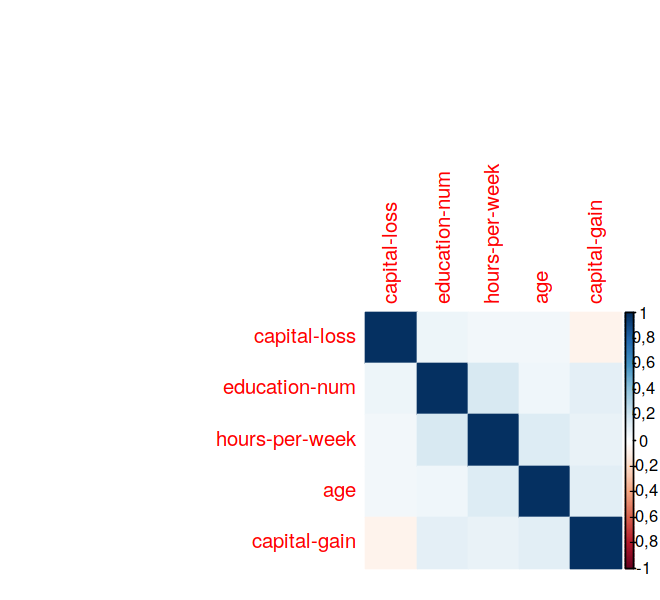

In [9]:
options(repr.plot.width=5.5, repr.plot.height=5)
corrplot(correlations, method = "color", order = "hclust", type = "full")

In [10]:
correlations

,age,education-num,capital-gain,capital-loss,hours-per-week
age,"1,00000000","0,06634497","0,12494799","0,05848388","0,14290681"
education-num,"0,06634497","1,00000000","0,11913972","0,07474870","0,16721512"
capital-gain,"0,12494799","0,11913972","1,00000000","-0,06656945","0,09332205"
capital-loss,"0,05848388","0,07474870","-0,06656945","1,00000000","0,05985243"
hours-per-week,"0,14290681","0,16721512","0,09332205","0,05985243","1,00000000"


So we don't see collerations between the numerical features.

Let's now try to plot some scatter plots for numerical variables using <code>income</code> as color.

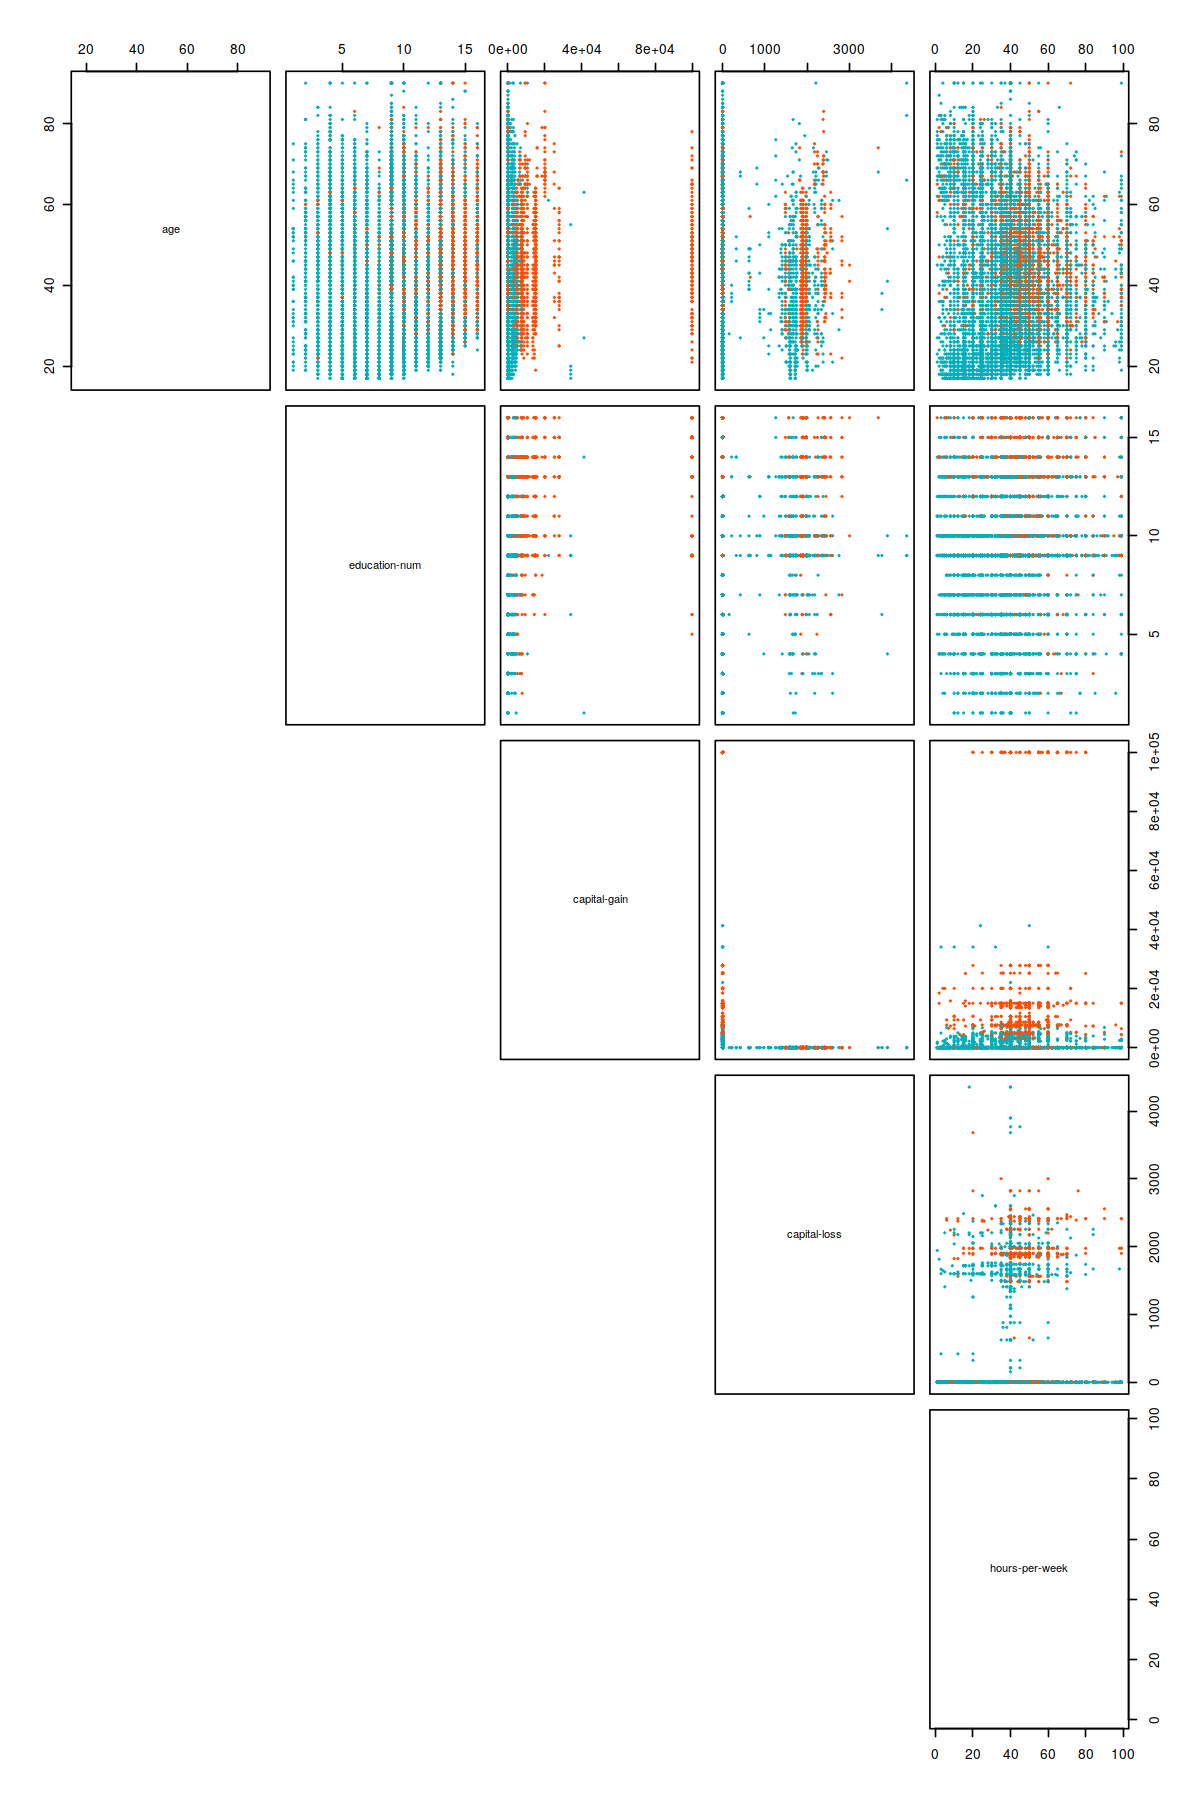

In [31]:
options(repr.plot.width=10, repr.plot.height=15)
my_cols <- c("#00AFBB", "#FC4E07")  
df <- AdultUCI[,map_lgl(AdultUCI, is.numeric)]
df$income <- AdultUCI$income
pairs(df %>% select(-income), pch = 5,  cex = 0.2,
      col = my_cols[df$income],
      lower.panel=NULL)

From this plot it's seems that the <code>capital gains</code> is important for the classification. From the other plot we don't see any particular pattern.

Let's try to see the distribution of the numerical variables dividied by the <code>income</code> variable.

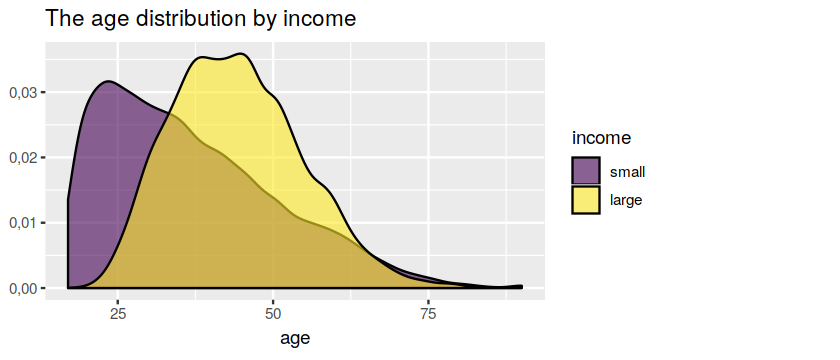

In [27]:
options(repr.plot.width=7, repr.plot.height=3)
ggplot(AdultUCI, aes(x = age, fill = income)) + geom_density(alpha = 0.6) +
    ggtitle("The age distribution by income", 
    ) + labs(y = NULL)

It's quite clear that being older is related to being richer.

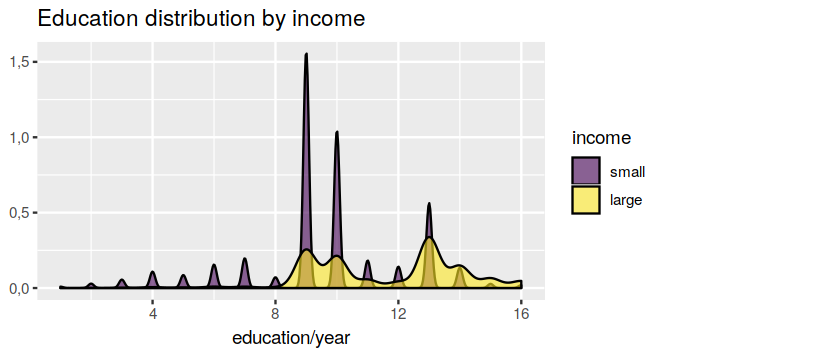

In [26]:
options(repr.plot.width=7, repr.plot.height=3)
ggplot(AdultUCI, aes(x = `education-num`, fill = income)) + geom_density(alpha = 0.6) + 
    ggtitle("Education distribution by income") + labs(x = "education/year", 
    y = NULL)

We can see that in the case of large income we don't have an education less than 8. In the case of small income we are concentrated around 9 and 10. We expect to have a different median in these cases. Let's see it in a boxplot.

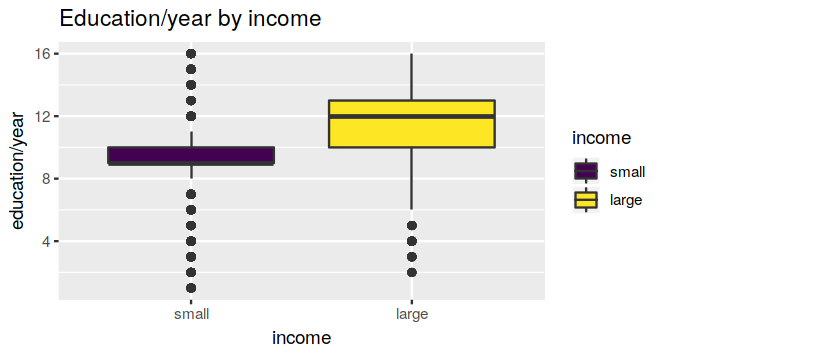

In [29]:
AdultUCI %>% ggplot(aes(x = income, y = `education-num`, fill = income)) + geom_boxplot() + 
    ggtitle("Education/year by income") + labs(y = "education/year")

Let's try to see <code>capital-gain</code> and <code>capital-loss</code> filtering the largest values.

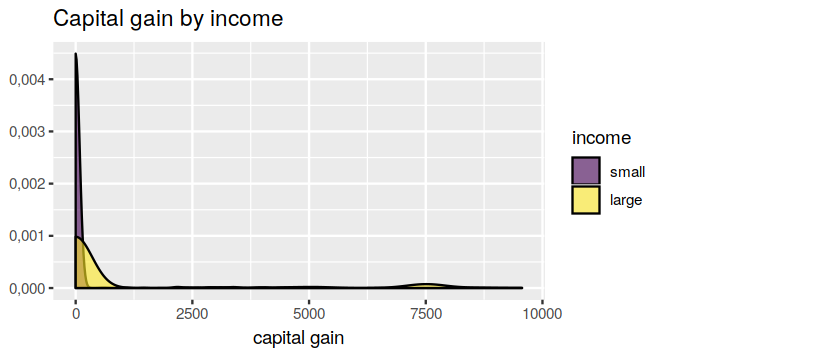

In [30]:
options(repr.plot.width=7, repr.plot.height=3)
AdultUCI  %>% filter(`capital-gain` < 10000) %>% ggplot(aes(x =  `capital-gain`, fill = income)) +
    geom_density(alpha = 0.6) +
    ggtitle("Capital gain by income") + labs(x =  "capital gain", y = NULL)

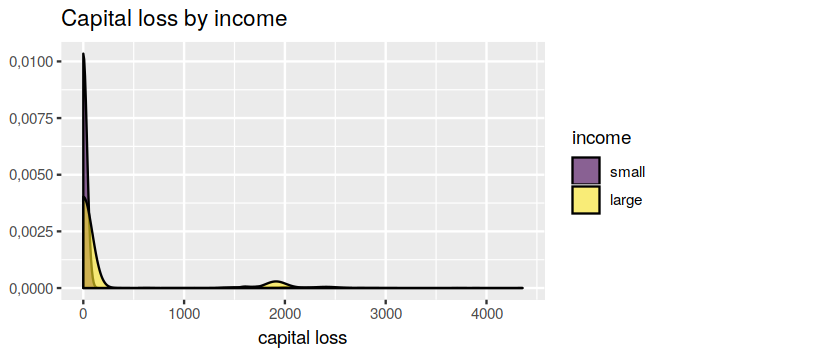

In [31]:
options(repr.plot.width=7, repr.plot.height=3)
ggplot(AdultUCI, aes(x =  `capital-loss`, fill = income)) + geom_density(alpha = 0.6) +
    ggtitle("Capital loss by income") + labs(x = "capital loss",  y = NULL)

In this case we see a difference too. In the capital loss case the difference seems smaller.

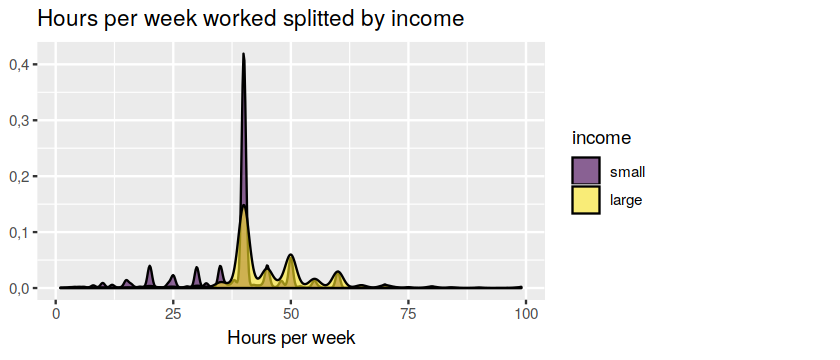

In [9]:
options(repr.plot.width=7, repr.plot.height=3)
ggplot(AdultUCI, aes(x = `hours-per-week`, fill = income )) + geom_density(alpha = 0.6) +
    ggtitle("Hours per week worked splitted by income", 
    ) + labs(y = NULL, x =  "Hours per week")

In this case we see that a small "Hours-per-week" is related with a small income. This is probably due to part-time jobs.

After that we don't see a clear pattern.

Now we want to do a __series of plot splitting the numerical variables in categories__ and seeing a possible __relationship with the output__.

These plots tell a similar story to the previous ones but from another point of view.

Let's start with <code>hours-per-week</code>.

In [36]:
AdultUCI %<>% mutate(levelsHoursPerWeek = NA)
AdultUCI$levelsHoursPerWeek[AdultUCI$`hours-per-week` <= 20] <- "lessThan20"
AdultUCI$levelsHoursPerWeek[AdultUCI$`hours-per-week` > 20 & AdultUCI$`hours-per-week` <= 40] <- "lessThan40"
AdultUCI$levelsHoursPerWeek[AdultUCI$`hours-per-week` > 40 & AdultUCI$`hours-per-week` <= 60] <- "lessThan60"
AdultUCI$levelsHoursPerWeek[AdultUCI$`hours-per-week` > 60 & AdultUCI$`hours-per-week` <= 80] <- "lessThan80"
AdultUCI$levelsHoursPerWeek[AdultUCI$`hours-per-week` > 80 & AdultUCI$`hours-per-week` <= 100] <- "lessThan100"

In [37]:
AdultUCI$levelsHoursPerWeek <- ordered(AdultUCI$levelsHoursPerWeek, levels = c("lessThan20",
                                                                              "lessThan40", 
                                                                              "lessThan60",
                                                                              "lessThan80",
                                                                              "lessThan100"))

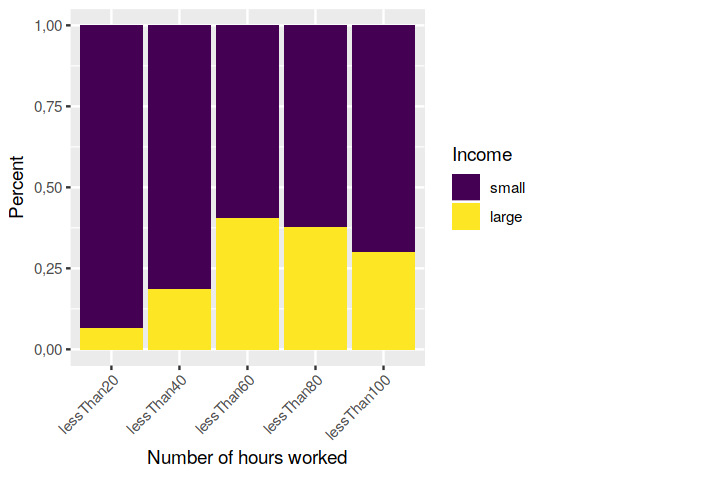

In [38]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(AdultUCI, 
       aes(x = levelsHoursPerWeek, 
           fill = income)) + 
  geom_bar(position = "fill") +
  theme(axis.text.x = element_text(angle = 45, hjust=1)) +
  labs(y = "Percent", 
       fill = "Income",
       x = "Number of hours worked")

We can see that working a lot of hours can be very useful to earn more money but only until 60 hours.

So we have a more precise information about the role of this variable.

We continue with <code>capital-gain</code>.

In [67]:
AdultUCI %<>% mutate(levelsCapitalGain = NA)
AdultUCI$levelsCapitalGain[AdultUCI$`capital-gain` <= 1000] <- "lessThan1000"
AdultUCI$levelsCapitalGain[AdultUCI$`capital-gain` > 1000 & AdultUCI$`capital-gain` <= 5000] <- "lessThan5000"
AdultUCI$levelsCapitalGain[AdultUCI$`capital-gain` > 5000 & AdultUCI$`capital-gain` <= 20000] <- "lessThan20000"
AdultUCI$levelsCapitalGain[AdultUCI$`capital-gain` > 20000 & AdultUCI$`capital-gain` <= 50000] <- "lessThan50000"
AdultUCI$levelsCapitalGain[AdultUCI$`capital-gain` > 50000 ] <- "moreThan50000"

In [68]:
AdultUCI$levelsCapitalGain <- ordered(AdultUCI$levelsCapitalGain, levels = c( "lessThan1000",
                                                                              "lessThan5000", 
                                                                              "lessThan20000",
                                                                              "lessThan50000",
                                                                              "moreThan50000"))

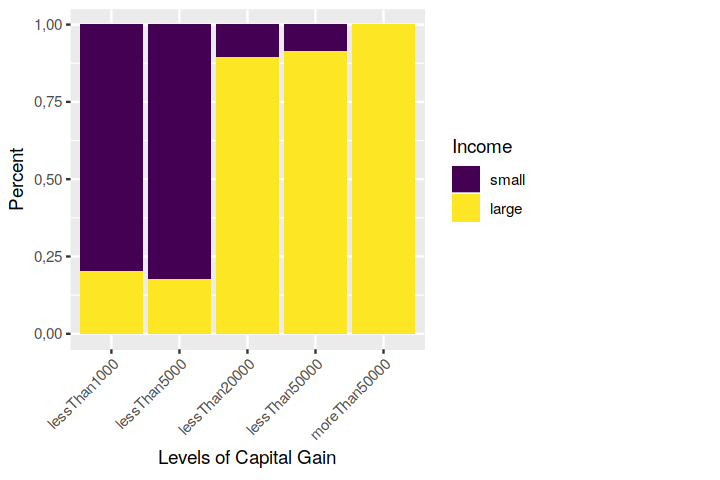

In [69]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(AdultUCI, 
       aes(x = levelsCapitalGain, 
           fill = income)) + 
  geom_bar(position = "fill") +
  theme(axis.text.x = element_text(angle = 45, hjust=1)) +
  labs(y = "Percent", 
       fill = "Income",
       x = "Levels of Capital Gain")

Obviously the more we earn the more the income is.

Let's finally see the <code>age</code>.

In [95]:
AdultUCI %<>% mutate(levelsAge = NA)
AdultUCI$levelsAge[AdultUCI$age <= 20] <- "lessThan20"
AdultUCI$levelsAge[AdultUCI$age > 20 & AdultUCI$age <= 30] <- "lessThan30"
AdultUCI$levelsAge[AdultUCI$age > 30 & AdultUCI$age <= 40] <- "lessThan40"
AdultUCI$levelsAge[AdultUCI$age > 40 & AdultUCI$age <= 50] <- "lessThan50"
AdultUCI$levelsAge[AdultUCI$age > 50 & AdultUCI$age <= 60] <- "lessThan60"
AdultUCI$levelsAge[AdultUCI$age > 60 & AdultUCI$age <= 70] <- "lessThan70"
AdultUCI$levelsAge[AdultUCI$age > 70 ] <- "MoreThan70"

In [96]:
AdultUCI$levelsAge <- ordered(AdultUCI$levelsAge, levels = c( "lessThan20",
                                                              "lessThan30", 
                                                              "lessThan40",
                                                              "lessThan50",
                                                              "lessThan60",
                                                              "lessThan70",
                                                              "MoreThan70"))

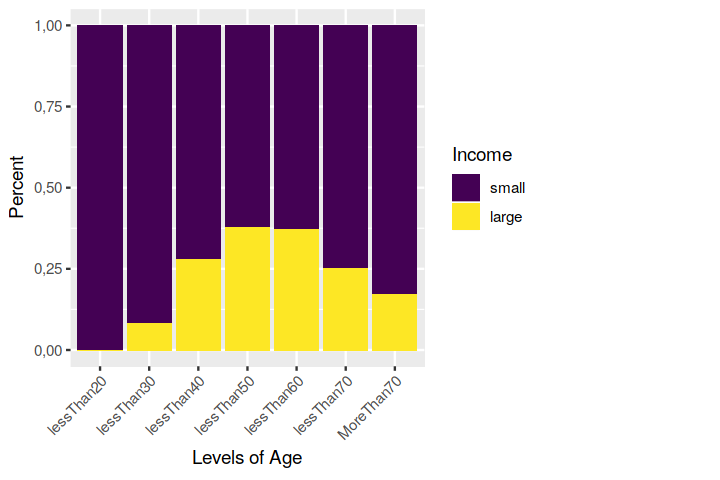

In [97]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(AdultUCI, 
       aes(x = levelsAge, 
           fill = income)) + 
  geom_bar(position = "fill") +
  theme(axis.text.x = element_text(angle = 45, hjust=1)) +
  labs(y = "Percent", 
       fill = "Income",
       x = "Levels of Age")

We clearly see than during the life before 60 years a lot of people increase their revenues. After 60 years the income is probably less due to the pension.

### Categorical variables

Let's plot different **charts for categorical variables in relationship with the income**.

Let's start with the <code>sex</code> variable.

We want to see the different proportion in the dataset.

`summarise()` ungrouping output (override with `.groups` argument)


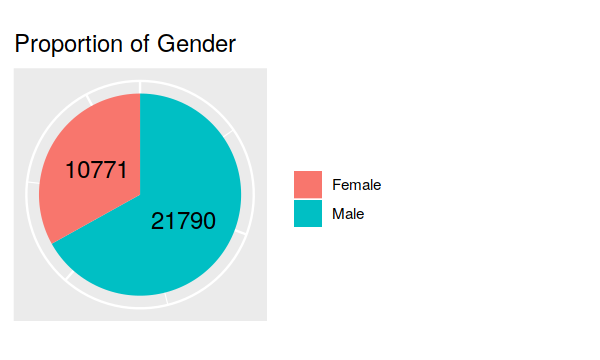

In [49]:
options(repr.plot.width=5, repr.plot.height=3)
AdultUCI[!is.na(AdultUCI$sex), ]  %>% group_by(sex) %>% summarise(n = n()) %>% ggplot(aes(x = "", y = n, fill = sex)) + 
    geom_bar(stat = "identity", width = 2) + coord_polar("y") + geom_text(aes(label = n), 
    position = position_stack(vjust = 0.5), check_overlap = T, size = 5) + labs(x = NULL, 
    y = NULL, fill = NULL, title = "Proportion of Gender") + theme(axis.line = element_blank(), 
    axis.text = element_blank(), axis.ticks = element_blank(), plot.title = element_text(size = 14))

We see that we have more male than female.

Let's now see the different income distribution.

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


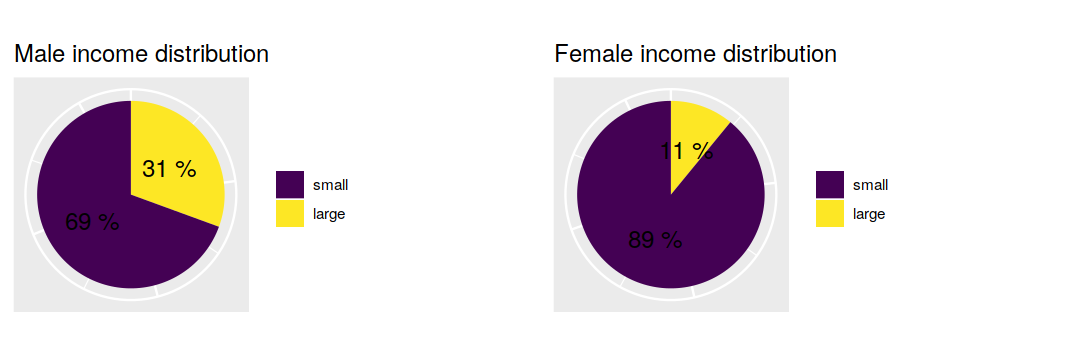

In [50]:
options(repr.plot.width=9, repr.plot.height=3)
male <- AdultUCI[!is.na(AdultUCI$sex), ] %>% filter(sex == "Male") %>% group_by(income) %>% summarise(n = n()) %>% 
    ggplot(aes(x = "", y = n, fill = income)) + geom_bar(stat = "identity", width = 2) + 
    coord_polar("y") + geom_text(aes(label = paste(100 * round(n/21790, 2), "%")), 
    position = position_stack(vjust = 0.5), check_overlap = T, size = 5) + labs(x = NULL, 
    y = NULL, fill = NULL, title = "Male income distribution") + theme(axis.line = element_blank(), 
    axis.text = element_blank(), axis.ticks = element_blank(), plot.title = element_text(size = 14))
female <- AdultUCI[!is.na(AdultUCI$sex), ] %>% filter(!sex == "Male") %>% group_by(income) %>% summarise(n = n()) %>% 
    ggplot(aes(x = "", y = n, fill = income)) + geom_bar(stat = "identity", width = 2) + 
    coord_polar("y") + geom_text(aes(label = paste(100 * round(n/10771, 2), "%")), 
    position = position_stack(vjust = 0.5), check_overlap = T, size = 5) + labs(x = NULL, 
    y = NULL, fill = NULL, title = "Female income distribution") + theme(axis.line = element_blank(), 
    axis.text = element_blank(), axis.ticks = element_blank(), plot.title = element_text(size = 14))
Rmisc::multiplot(male, female, cols = 2)

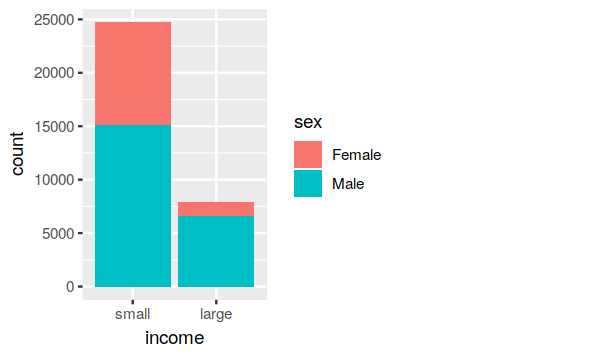

In [12]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(AdultUCI, 
       aes(x = income, 
           fill = sex)) + 
  geom_bar(position = "stack")

It's clear that <code>sex</code> is very important for predicting the <code>income</code> variable. 

The majority of large income is related with <code>Male</code> despite of they are more. For the small income there is almost the same distribution.

Let's move on seeing other variables.

`summarise()` regrouping output by 'income' (override with `.groups` argument)


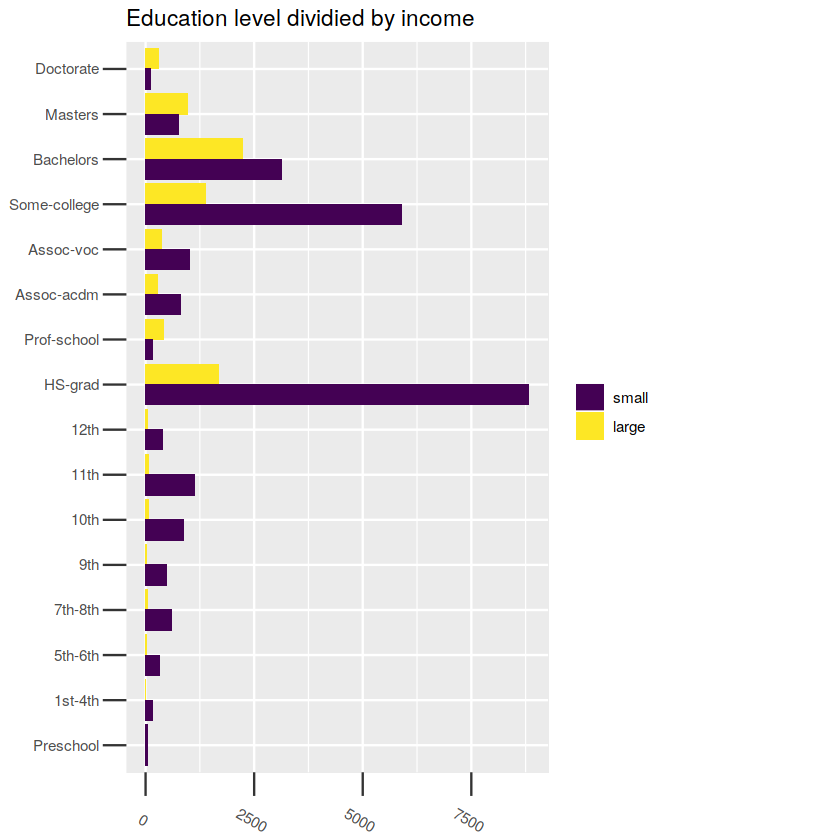

In [32]:
options(repr.plot.width=7, repr.plot.height=7)
AdultUCI[!is.na(AdultUCI$income),] %>% group_by(income, education) %>% summarise(n = n()) %>% ggplot(aes(education, 
    n, fill = income)) + geom_bar(stat = "identity", position = "dodge") + theme(axis.ticks.length = unit(0.5, 
    "cm"), axis.text.x = element_text(angle = 330)) + guides(fill = guide_legend(title = NULL)) + 
    coord_flip() + labs(x = NULL, y = NULL) + ggtitle("Education level dividied by income")

The <code>education</code> too seems very important. Without a title is very difficout to earn a lot. 
In fact in the small income plot half of the bar is occupied by people with high education and the other half one by low education. In the high income the majority is associated with high education.

`summarise()` regrouping output by 'income' (override with `.groups` argument)


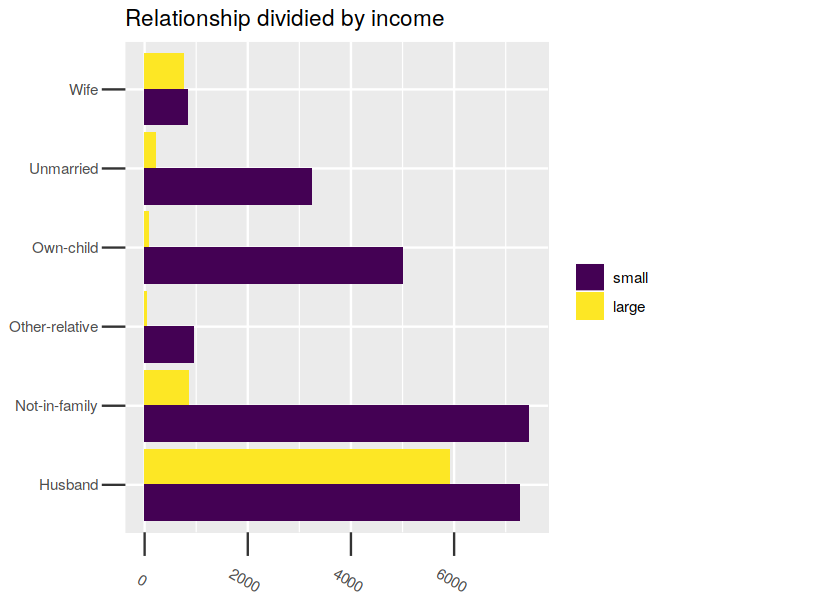

In [31]:
options(repr.plot.width=7, repr.plot.height=5)
AdultUCI[!is.na(AdultUCI$income),] %>% group_by(income, relationship) %>% summarise(n = n()) %>% ggplot(aes(relationship, 
    n, fill = income)) + geom_bar(stat = "identity", position = "dodge") + theme(axis.ticks.length = unit(0.5, 
    "cm"), axis.text.x = element_text(angle = 330)) + guides(fill = guide_legend(title = NULL)) + 
    coord_flip() + labs(x = NULL, y = NULL) + ggtitle("Relationship dividied by income")

From this plot it seems that to have a family is very useful to have a good income. On the contrary it seems that to not have a family can cause some difficulties to have an high income. 

`summarise()` regrouping output by 'income' (override with `.groups` argument)


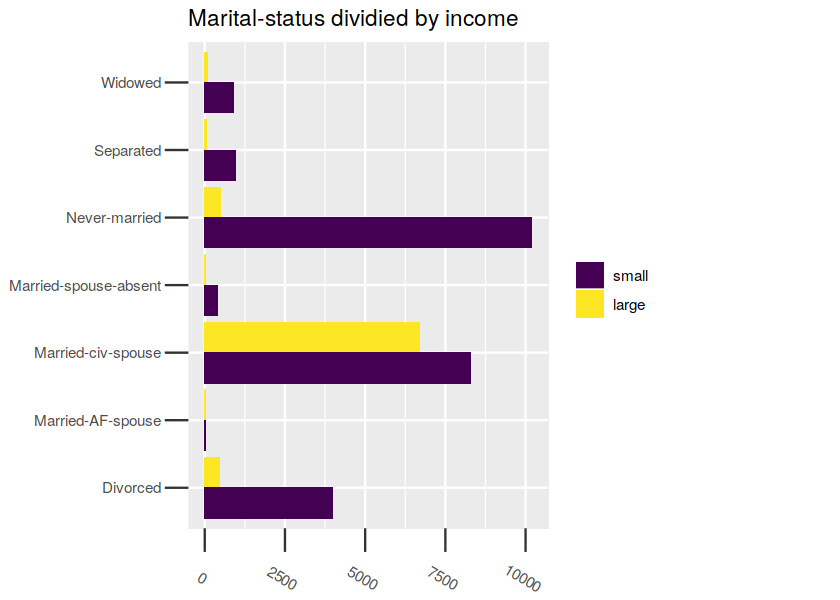

In [41]:
options(repr.plot.width=7, repr.plot.height=5)
AdultUCI %>% group_by(income, `marital-status`) %>% summarise(n = n()) %>% ggplot(aes(`marital-status`, 
    n, fill = income)) + geom_bar(stat = "identity", position = "dodge") + theme(axis.ticks.length = unit(0.5, 
    "cm"), axis.text.x = element_text(angle = 330)) + guides(fill = guide_legend(title = NULL)) + 
    coord_flip() + labs(x = NULL, y = NULL) + ggtitle("Marital-status dividied by income")

In this case "married-civ-spouse" seems to be very informative.

Let's see the workclass.

`summarise()` regrouping output by 'income' (override with `.groups` argument)


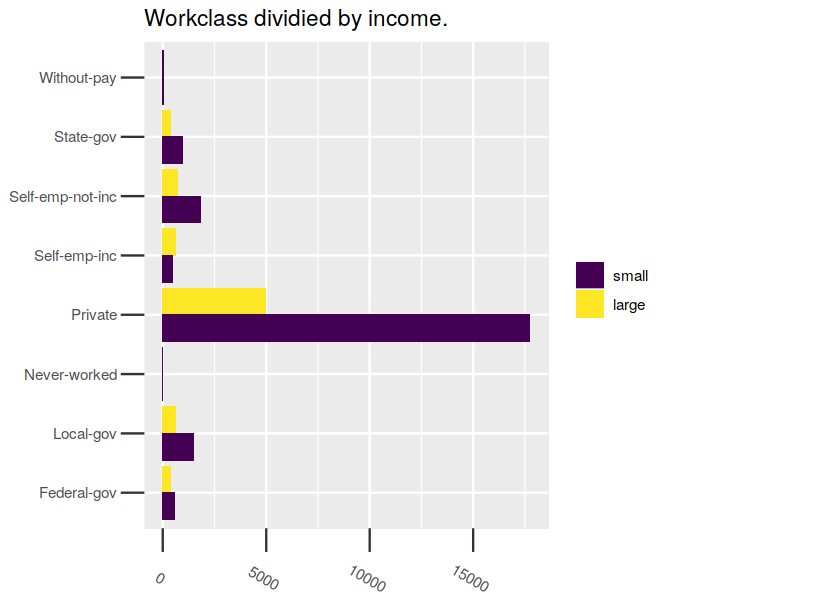

In [35]:
options(repr.plot.width=7, repr.plot.height=5)
AdultUCI[!(is.na(AdultUCI$income) | is.na(AdultUCI$workclass)),] %>% group_by(income, `workclass`) %>% summarise(n = n()) %>% ggplot(aes(workclass, 
    n, fill = income)) + geom_bar(stat = "identity", position = "dodge") + theme(axis.ticks.length = unit(0.5, 
    "cm"), axis.text.x = element_text(angle = 330)) + guides(fill = guide_legend(title = NULL)) + 
    coord_flip() + labs(x = NULL, y = NULL) + ggtitle("Workclass dividied by income.")

We don't see a clear pattern in this case. 

`summarise()` regrouping output by 'income' (override with `.groups` argument)


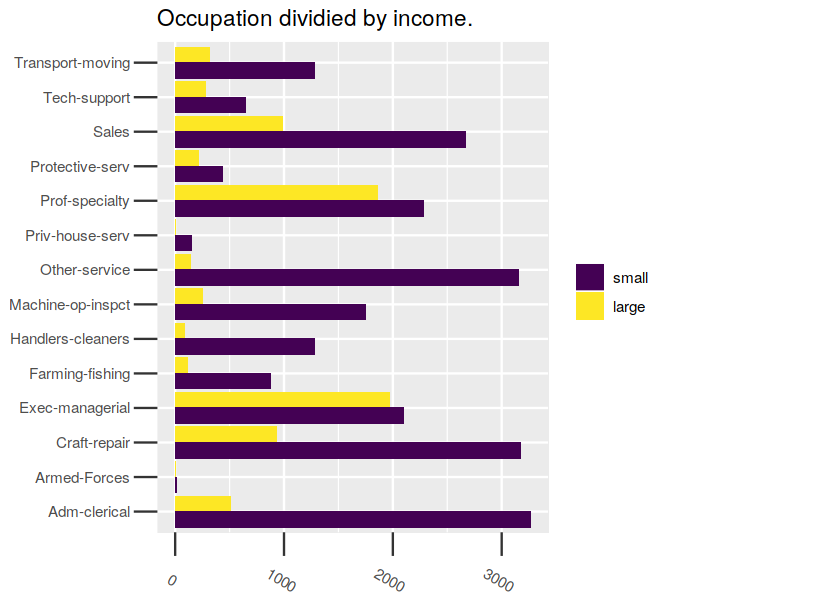

In [38]:
options(repr.plot.width=7, repr.plot.height=5)
AdultUCI[!(is.na(AdultUCI$income) | is.na(AdultUCI$occupation)),] %>% group_by(income, `occupation`) %>% summarise(n = n()) %>% ggplot(aes(occupation, 
    n, fill = income)) + geom_bar(stat = "identity", position = "dodge") + theme(axis.ticks.length = unit(0.5, 
    "cm"), axis.text.x = element_text(angle = 330)) + guides(fill = guide_legend(title = NULL)) + 
    coord_flip() + labs(x = NULL, y = NULL) + ggtitle("Occupation dividied by income.")

It's quite clear that some jobs like "Exec-managerial" and "Prof-specialty" are very profitable.

On the contrary "other-service" seems associated to small income.

`summarise()` regrouping output by 'income' (override with `.groups` argument)


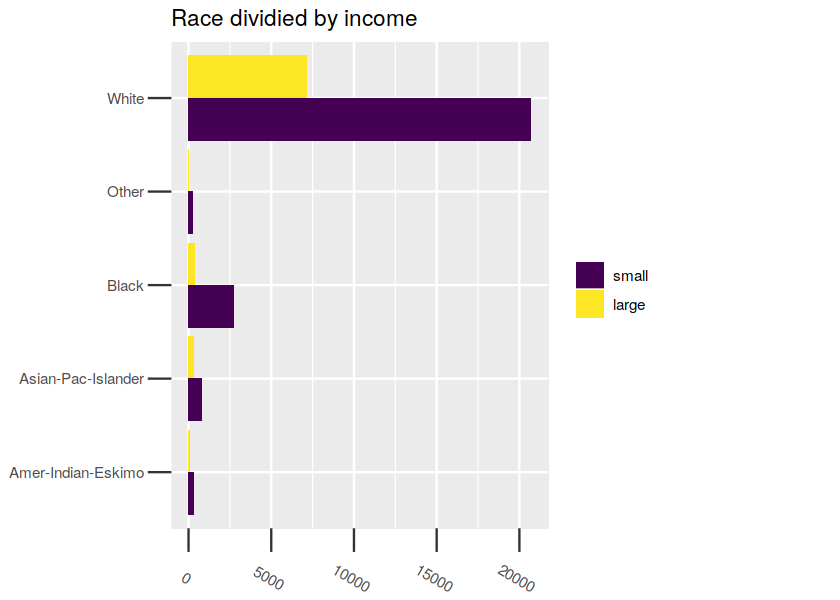

In [43]:
options(repr.plot.width=7, repr.plot.height=5)
AdultUCI %>% group_by(income, `race`) %>% summarise(n = n()) %>% ggplot(aes(race, 
    n, fill = income)) + geom_bar(stat = "identity", position = "dodge") + theme(axis.ticks.length = unit(0.5, 
    "cm"), axis.text.x = element_text(angle = 330)) + guides(fill = guide_legend(title = NULL)) + 
    coord_flip() + labs(x = NULL, y = NULL) + ggtitle("Race dividied by income")

We don't see a clear pattern in this case in particular because the majority of the sample is composed by white people. 

# 4. Preparation of the different sets

## Dataset splitting

Let's create the three sets that we will use:
1. A training set that we will use to estimate the model hyperparameters, tuning model and model selection.
2. A small evaluation set to select the probability cutoffs and other post-processing techniques.
3. A test set to evaluate the test error.

The <code>createDataPartition</code> function keeps the imbalance constant in the different datasets.

In [18]:
set.seed(2)
split1 <- createDataPartition(AdultUCI$income, p = 0.7, list  = FALSE)
trainingBeforeTrans <- AdultUCI[split1, ]
other <- AdultUCI[-split1, ]

set.seed(2)
split2 <- createDataPartition(other$income, p = 1/3, list  = FALSE)
evalutationBeforeTrans <- other[split2, ]
testingBeforeTrans <- other[- split2, ]

Let's see the number of rows in each dataset.

In [19]:
print(paste0("Number of rows for total dataset is ", nrow(AdultUCI)))
print(paste0("Number of rows for training is ", nrow(trainingBeforeTrans)))
print(paste0("Number of rows for evalutation is ", nrow(evalutationBeforeTrans)))
print(paste0("Number of rows for testing is ", nrow(testingBeforeTrans)))

[1] "Number of rows for total dataset is 32561"
[1] "Number of rows for training is 22793"
[1] "Number of rows for evalutation is 3256"
[1] "Number of rows for testing is 6512"


Let's see if the class frequencies are respected in the splitting.

In [20]:
cat("Proportion of the income for the different datasets")
cat("\n\nOriginal:")
table(AdultUCI$income)/nrow(AdultUCI)
cat("\nTraining")
print(table(trainingBeforeTrans$income)/nrow(trainingBeforeTrans))
cat("\nEvaluation:")
print(table(evalutationBeforeTrans$income)/nrow(evalutationBeforeTrans))
cat("\nTesting:")
print(table(testingBeforeTrans$income)/nrow(testingBeforeTrans))

Proportion of the income for the different datasets

Original:


    small     large 
0,7591904 0,2408096 


Training
    small     large 
0,7591805 0,2408195 

Evaluation:
    small     large 
0,7592138 0,2407862 

Testing:
    small     large 
0,7592138 0,2407862 


This is a good new! In particular the testing set follow the original distribution so it's good to estimate the real error.

# Dummy transformation

Now we want to transform our input variables in an accetable format for our algorithms.
For the categorical ones we will use two approaches:
1. **One-hot encoding** for nominal variables.
2. **Orthogonal polynomials** for ordinal variables (for more details see [here](http://appliedpredictivemodeling.com/blog/2013/10/23/the-basics-of-encoding-categorical-data-for-predictive-models)): "The nice thing here is that, if the underlying relationship between the ordered factor and the outcome is cubic, we have a feature in the data that can capture that trend.").

In [21]:
dummyTrans <- dummyVars( ~ ., fullRank = TRUE, data = trainingBeforeTrans)
trainingDummy <- predict(dummyTrans, trainingBeforeTrans) %>% data.frame 
evaluationDummy <- predict(dummyTrans, evalutationBeforeTrans) %>% data.frame 
testingDummy <- predict(dummyTrans, testingBeforeTrans) %>% data.frame 

In [22]:
print(paste0("Number of columns before transformation: ", ncol(trainingBeforeTrans)))
print(paste0("Number of columns after transformation: ", ncol(trainingDummy)))

[1] "Number of columns before transformation: 14"
[1] "Number of columns after transformation: 97"


Let's now remove the <code>near-zero-variables</code> to use a <code>KNN</code> to impute NA values.

This is important because we have to normalize the data before imputing and a near zero variance is not good.

In [23]:
isNZV <- nearZeroVar(trainingDummy)

In [24]:
preProcess_missingdata_model <- preProcess(trainingDummy[,-isNZV], method = c('knnImpute'))

trainingFilled <- predict(preProcess_missingdata_model, newdata = trainingDummy[,-isNZV])
evaluationFilled <- predict(preProcess_missingdata_model, newdata = evaluationDummy[,-isNZV])
testingFilled <- predict(preProcess_missingdata_model, newdata = testingDummy[,-isNZV])

With this inputation we also have scaled and centered our data.

In [25]:
preProcess_missingdata_model

Created from 21111 samples and 38 variables

Pre-processing:
  - centered (38)
  - ignored (0)
  - 5 nearest neighbor imputation (38)
  - scaled (38)


In [27]:
print(paste0("Number of NA for training: ", as.numeric(any(colSums(is.na(trainingFilled)) > 0))))
print(paste0("Number of NA for evaluation: ", as.numeric(any(colSums(is.na(evaluationFilled)) > 0))))
print(paste0("Number of NA for testing: ", as.numeric(any(colSums(is.na(testingFilled)) > 0))))

[1] "Number of NA for training: 0"
[1] "Number of NA for evaluation: 0"
[1] "Number of NA for testing: 0"


Let's transform the <code>income.L</code> variable into a factor variable and change the levels.

In [28]:
trainingFilled$income.L %<>% as.factor
evaluationFilled$income.L %<>% as.factor
testingFilled$income.L %<>% as.factor

In [33]:
trainingFilled$income.L <- plyr::revalue(trainingFilled$income.L,
                                            c("-0,563201541793709"="small", "1,77548542160655"="large")
                                           )
evaluationFilled$income.L <- plyr::revalue(evaluationFilled$income.L,
                                            c("-0,563201541793709"="small", "1,77548542160655"="large")
                                           )
testingFilled$income.L <- plyr::revalue(testingFilled$income.L,
                                            c("-0,563201541793709"="small", "1,77548542160655"="large")
                                           )

In [34]:
trainingFilled$income.L <- factor(trainingFilled$income.L , levels = rev(levels(trainingFilled$income.L )))
evaluationFilled$income.L <- factor(evaluationFilled$income.L , levels = rev(levels(evaluationFilled$income.L)))
testingFilled$income.L <- factor(testingFilled$income.L, levels = rev(levels(testingFilled$income.L)))

We note that we revert the levels because otherwise, according to [caret documentation](https://topepo.github.io/caret/measuring-performance.html) the first level class is used to refer the sensitivity, specificity and so on in the modeling part. The first class is associated with the most frequent one and we're not interested in that.

# 5. Modeling part

We start our analysis of the modeling part.

In [4]:
# only for saving time in the analysis.
trainingFilled <- readRDS("./dataset/trainingFilled.RDS")
evaluationFilled <- readRDS("./dataset/evaluationFilled.RDS")
testingFilled <- readRDS("./dataset/testingFilled.RDS")

We first create different control functions. In fact we remember that when we work with weighted methods we cannot use probabilities so we cannot use metrics associated to them.

We create 2 summary functions because in the first one we have the ROC curve also that we cannot use in the weighted methods.

In [5]:
fiveStats <- function(...) c(twoClassSummary(...), 
                          defaultSummary(...))

fourStats <- function(data, lev = levels(data$obs), model = NULL){
    accKappa <- postResample(data[, "pred"], data[, "obs"])
    out <- c(accKappa,
            sensitivity(data[, "pred"], data[,"obs"],lev[1]),
            specificity(data[, "pred"], data[,"obs"],lev[2]))
    names(out)[3:4] <- c("Sens", "Spec")
    out
}
ctrl <- trainControl(method = "cv",
                    classProbs = TRUE,
                    summaryFunction = fiveStats,
                    verboseIter = TRUE,
                    savePred = TRUE
                    )
ctrlNoprob <- ctrl
ctrlNoprob$summaryFunction <- fourStats
ctrlNoprob$classProbs <- FALSE

## 5.1 Models without improvements

We start with the models without using any improvement on the models.

### Training phase


We want to parallelize our code with different cores.

In [54]:
set.seed(2000)
registerDoMC(cores = 3)
rfFit <- train(income.L ~ ., data = trainingFilled,
               method = "rf",
               trControl = ctrl,
               ntree = 1500,
               tuneLength = 10,
               metric = "ROC")

Aggregating results
Selecting tuning parameters
Fitting mtry = 9 on full training set


In [4]:
# only for saving time in the analysis.
rfFit <- readRDS("./models/rfNotBalanced.RDS")

In [5]:
rfFit

Random Forest 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec       Accuracy   Kappa    
   2    0.8451694  0.4390557  0.9486824  0.8259550  0.4488984
   5    0.8746659  0.5711350  0.9240057  0.8390287  0.5292636
   9    0.8788555  0.6035642  0.9124480  0.8380636  0.5380357
  13    0.8768687  0.6055712  0.9043571  0.8324039  0.5266002
  17    0.8727712  0.6017460  0.9011210  0.8290258  0.5181289
  21    0.8697744  0.5962806  0.8980579  0.8253844  0.5086343
  25    0.8665991  0.5917255  0.8966133  0.8231909  0.5024287
  29    0.8640074  0.5904511  0.8940706  0.8209536  0.4973229
  33    0.8621321  0.5911797  0.8922214  0.8197254  0.4950216
  37    0.8606701  0.5909969  0.8916436  0.8192429  0.4939676

ROC was used to select the optimal model using the largest val

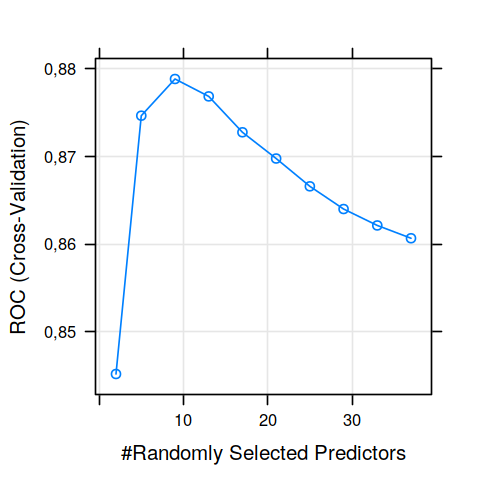

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot(rfFit)

In [46]:
set.seed(2000)
registerDoMC(cores = 5)
lrFit <- train(income.L ~ ., data = trainingFilled,
               method = "glm",
               family = "binomial",
               trControl = ctrl,
               metric = "ROC" )

Aggregating results
Fitting final model on full training set


In [27]:
# only for saving time in the analysis.
lrFit <- readRDS("./models/lrNotBalanced.RDS")

In [115]:
lrFit

Generalized Linear Model 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Resampling results:

  ROC        Sens       Spec       Accuracy   Kappa   
  0,8815966  0,5348813  0,9241207  0,8303857  0,497314


In [49]:
set.seed(2000)
registerDoMC(cores = 5)
knnFit <- train(income.L ~ ., data = trainingFilled,
               method = "knn",
               trControl = ctrl,
               tuneLength = 20,
               metric = "ROC" )

Aggregating results
Selecting tuning parameters
Fitting k = 37 on full training set


In [6]:
# only for saving time in the analysis.
knnFit <- readRDS("./models/knnNotBalanced.RDS")

In [51]:
knnFit

k-Nearest Neighbors 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec       Accuracy   Kappa    
   5  0,8438281  0,5909956  0,8929723  0,8202513  0,4960645
   7  0,8579270  0,5888081  0,8956889  0,8217869  0,4985031
   9  0,8629961  0,5904488  0,8969021  0,8231031  0,5018305
  11  0,8666799  0,5968283  0,8979997  0,8254720  0,5090421
  13  0,8686371  0,5920895  0,8984620  0,8246823  0,5057487
  15  0,8708380  0,5942763  0,8992706  0,8258224  0,5089408
  17  0,8718949  0,5891761  0,9011774  0,8260415  0,5076784
  19  0,8727737  0,5818868  0,9016402  0,8246382  0,5020896
  21  0,8734286  0,5820676  0,9029691  0,8256906  0,5043837
  23  0,8744357  0,5844355  0,9032579  0,8264802  0,5068565
  25  0,8744565  0,5822481  0,9034315  0,8260855  0,5052553
  27  0,8746798  0,

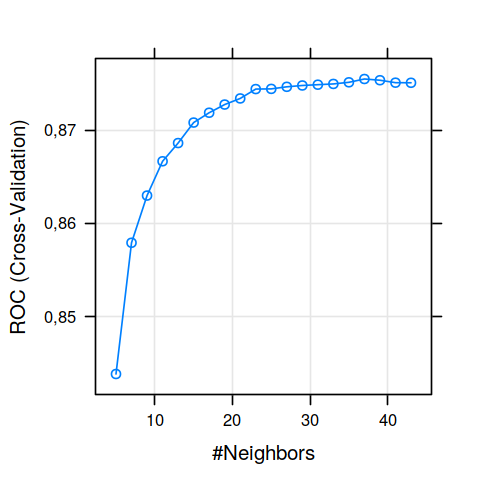

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
plot(knnFit)

### Evaluation phase


Let's try to predict our evaluation set.

We note that we will use both ROC and precision-recall curves. 

These curves are quite good because they're threshold independent. In such a way we refer the threshold choice.

In [16]:
evalResults <- data.frame(income = evaluationFilled$income.L)

In [17]:
evalResults$RF <- predict(rfFit,
       newdata = evaluationFilled,
       type = "prob")[,1]

In [18]:
evalResults$lr <- predict(lrFit,
       newdata = evaluationFilled,
       type = "prob")[,1]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [19]:
evalResults$knn <- predict(knnFit,
       newdata = evaluationFilled,
       type = "prob")[,1]

We want to plot the __ROC curve__ for the three method.

In [20]:
predRF <- prediction(evalResults$RF , evalResults$income, label.ordering = c("small", "large"))
perfRF <- performance(predRF, "tpr", "fpr")

predlr <- prediction(evalResults$lr , evalResults$income, label.ordering = c("small", "large"))
perflr <- performance(predlr, "tpr", "fpr")

predknn <- prediction(evalResults$knn , evalResults$income, label.ordering = c("small", "large"))
perfknn <- performance(predknn, "tpr", "fpr")

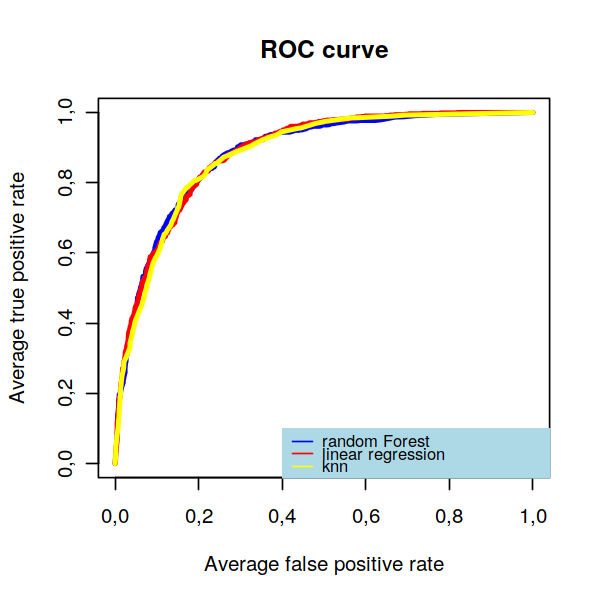

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
plot(perfRF, avg = "threshold", col = "blue", lwd= 3,
   main= "ROC curve")
plot(perflr, avg = "threshold", col = "red", add = T, lwd= 3
  )
plot(perfknn, avg = "threshold", col = "yellow", add = T, lwd= 3
   )
legend(0.4,0.1, 
       legend = c("random Forest", "linear regression", "knn"), 
       col = c("blue", "red", "yellow"),
       cex = 0.8,
       text.font=1,
       bg='lightblue',
       lty = 1,
       box.lty=0)

Let's try with the __precision-recall curve__.

In [22]:
predlr <- prediction(evalResults$lr, evalResults$income, label.ordering = c("small", "large"))
perflr <- performance(predlr,"prec","rec")

predrf <- prediction(evalResults$RF, evalResults$income, label.ordering = c("small", "large"))
perfrf <- performance(predrf,"prec","rec")

predknn <- prediction(evalResults$knn, evalResults$income, label.ordering = c("small", "large"))
perfknn <- performance(predknn,"prec","rec")

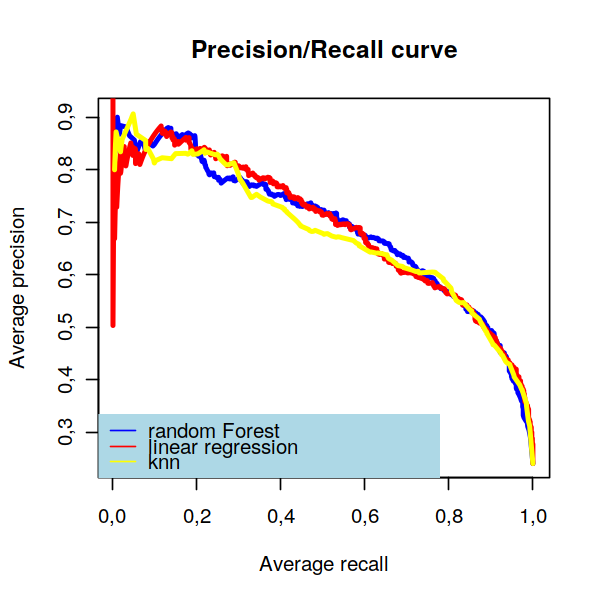

In [16]:
options(repr.plot.width=5, repr.plot.height=5)
plot(perfrf, avg = "threshold", col = "blue", lwd= 3,
   main= "Precision/Recall curve")
plot(perflr, avg = "threshold", col = "red", add = T, lwd= 3
  )
plot(perfknn, avg = "threshold", col = "yellow", add = T, lwd= 3
   )
legend("bottomleft", 
       legend = c("random Forest", "logistic regression", "knn"), 
       col = c("blue", "red", "yellow"),
       text.font=1,
       bg='lightblue',
       lty = 1,
       box.lty=0)

In this case we see that the KNN is the worst method while the logistic regression and random forest are the best ones.

Let's finally see a plot with other metrics.

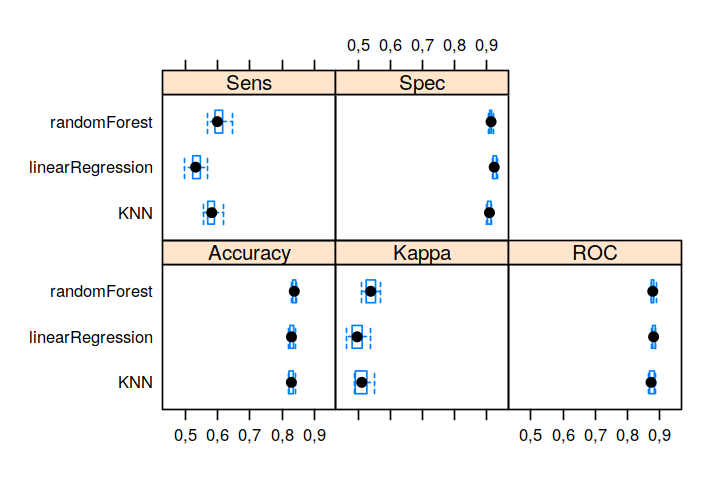

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
resamp <- resamples(list(linearRegression = lrFit, 
                         KNN = knnFit,
                         randomForest = rfFit
                         )
                    )
bwplot(resamp)

As a conclusion we can say that __the three models are pretty similar__. 

They have the same ROC. So in this case it's not a good metric to evaluate the best model.

If we use the precision-recall curve we can see that the logistic regression it's similar to the random forest. 

From the last plot we have more sensitivity in the random forest but this is not the best model with the precision-recall curve. We probably have more false positives than the logistic regression model.

At the end we decide to use the logistic regression for the following analysis because it has good results despite of its simplicity.

## 5.2 Threshold selection

Let's try to improve our model __changing the threshold__. We remind that we are only changing the value off the diagonal of the confusion matrix but not on the diagonal. 

In addition we say that the threshold selection doesn't influence the model selection because the ROC and the precision-recall curve are threshold independent. So we directly use the logistic regression model.

We use two methods:
1. We pick the value __nearest the top left corner__.
2. We pick the value that __maximize the Youndex index__:

$$
J(tr) = Sensitivity(tr) + Specificity(tr) - 1
$$

In [7]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [23]:
roclr <- roc(evalResults$income, evalResults$lr,
   levels = rev(levels(evalResults$income)))

Setting direction: controls < cases


In [25]:
lrThreshC <- coords(roclr, x = "best", best.method = "closest.topleft", transpose = FALSE)
lrThreshC

threshold,specificity,sensitivity
"0,267626","0,7868123","0,8303571"


In [24]:
lrThreshY <- coords(roclr, x = "best", best.method = "youden", transpose = FALSE)
lrThreshY

threshold,specificity,sensitivity
"0,2452999","0,769822","0,8482143"


As we know there is a __trade-off between specificity and sensitivity__.

But without the threshold selection we have a sensitivity of $0.53$ and a specificity of $0.92$. Losing a $9\%$ 
of specificity we gain a $25\%$ of sensitivity so it's a good gain.

We remind that this last observation depends on the application. Sometimes is better to reach the best trade-off, sometimes it's better to focus on the specificity, and some other ones on the sensitivity.

## 5.3 Sampling methods

Let's move on now on the sampling method.
In particular we will try:
1. __down sampling.__
2.__up sampling.__
3. __SMOTE.__ 

In [117]:
ctrl$sampling <- "down"

In [120]:
set.seed(2000)
registerDoMC(cores = 3)
lrDown <- train(income.L ~ ., data = trainingFilled,
               method = "glm",
               family = "binomial",
               trControl = ctrl,
               metric = "ROC")

Aggregating results
Fitting final model on full training set


In [7]:
# only for saving time in the analysis.
lrDown <- readRDS("./models/lrDown.RDS")

In [121]:
lrDown

Generalized Linear Model 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Addtional sampling using down-sampling

Resampling results:

  ROC       Sens       Spec       Accuracy   Kappa   
  0,881041  0,8440459  0,7623661  0,7820374  0,504274


In [123]:
ctrl$sampling <- "up"

In [132]:
set.seed(2000)
registerDoMC(cores = 3)
lrUp <- train(income.L ~ ., data = trainingFilled,
               method = "glm",
               family = "binomial",
               trControl = ctrl,
               metric = "ROC")

Aggregating results
Fitting final model on full training set


In [9]:
# only for saving time in the analysis.
lrUp <- readRDS("./models/lrUp.RDS")

In [134]:
lrUp

Generalized Linear Model 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Addtional sampling using up-sampling

Resampling results:

  ROC        Sens       Spec      Accuracy   Kappa   
  0,8814743  0,8436816  0,763464  0,7827834  0,505436


In [136]:
ctrl$sampling <- "smote"

In [33]:
set.seed(2000)
registerDoMC(cores = 3)
lrSMOTE <- train(income.L ~ ., data = trainingFilled,
               method = "glm",
               family = "binomial",
               trControl = ctrl,
               metric = "ROC")

Aggregating results
Fitting final model on full training set


In [37]:
saveRDS(lrSMOTE,"./models/lrSMOTE.RDS")

In [31]:
# only for saving time in the analysis.
lrSMOTE <- readRDS("./models/lrSMOTE.RDS")

Warning message in gzfile(file, "rb"):
“cannot open compressed file './models/lrSMOTE.RDS', probable reason 'No such file or directory'”

ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [140]:
lrSMOTE

Generalized Linear Model 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Addtional sampling using SMOTE

Resampling results:

  ROC        Sens       Spec       Accuracy   Kappa    
  0,8811196  0,7822876  0,8098113  0,8031841  0,5238362


Let's compare the several methods:

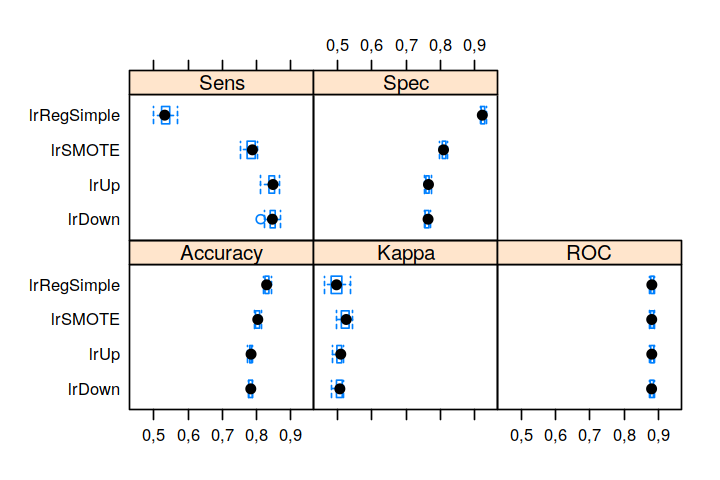

In [142]:
options(repr.plot.width=6, repr.plot.height=4)
resamp <- resamples(list(lrRegSimple = lrFit, 
                         lrUp = lrUp,
                         lrDown = lrDown,
                         lrSMOTE = lrSMOTE
                         )
                    )
bwplot(resamp)

From this plot is not very clear which is the best model.

Let's try with the precision-recall curve.

In [143]:
evalResults <- data.frame(income = evaluationFilled$income.L)

In [144]:
evalResults$normal <- predict(lrFit,
       newdata = evaluationFilled,
       type = "prob")[,1]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [145]:
evalResults$up <- predict(lrUp,
       newdata = evaluationFilled,
       type = "prob")[,1]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [146]:
evalResults$down <- predict(lrDown,
       newdata = evaluationFilled,
       type = "prob")[,1]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [148]:
evalResults$smote <- predict(lrSMOTE,
       newdata = evaluationFilled,
       type = "prob")[,1]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [149]:
prednormal <- prediction(evalResults$normal, evaluationFilled$income.L, label.ordering = c("small", "large"))
perfnormal <- performance(prednormal,"prec","rec")

predDown <- prediction(evalResults$down, evaluationFilled$income.L, label.ordering = c("small", "large"))
perfDown <- performance(predDown,"prec","rec")

predUp <- prediction(evalResults$up, evaluationFilled$income.L, label.ordering = c("small", "large"))
perfUp <- performance(predUp,"prec","rec")

predSmote <- prediction(evalResults$smote, evaluationFilled$income.L, label.ordering = c("small", "large"))
perfSmote <- performance(predSmote,"prec","rec")

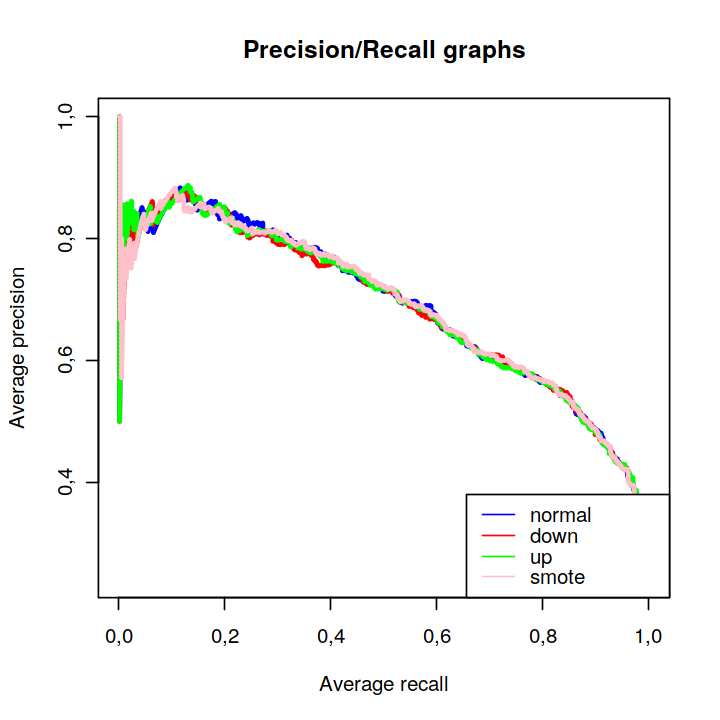

In [150]:
options(repr.plot.width=6, repr.plot.height=6)
plot(perfnormal, avg = "threshold", col = "blue", lwd= 3,
   main= "Precision/Recall graphs")
plot(perfDown, lty=3, col="red", add=T, lwd= 3)
plot(perfUp, lty=3, col="green", add=T, lwd= 3)
plot(perfSmote, lty=3, col="pink", add=T, lwd= 3)
legend("bottomright", 
       legend = c("normal", "down", "up", "smote"), 
       col = c("blue", "red", "green", "pink"),
       lty = 1)

We don't see any improvement in the model using a sampling technique. 

This can sound strange but it's not. We remind that we are working with a slight imbalanced dataset so it's possible that rebalance it can have no influence.

# 5.4 Cost-sensitive training

Let's try now to use a weighted method to classify. 

In this case we change the loss function using some sort of weights.

We will try a broad range of weights and try to select the best one.

In [8]:
weightsList <- list()
for (i in 2:10){
    weightsList[[i]] <- ifelse(trainingFilled$income.L == "large", i, 1)
}

In [59]:
modelWeighted <- list()
registerDoMC(cores = 3)
for(i in 1:length(weightsList)){
    set.seed(2000)
    modelWeighted[[i]]  <- train(income.L ~ ., 
               data = trainingFilled,
               weights = weightsList[[i]],
               method = "glm",
               family = "binomial",
               trControl = ctrlNoprob,
               metric = "Sens")
}

Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set
Aggregating results
Fitting final model on full training set


In [9]:
modelWeighted <- readRDS("./models/lrWeightedList.RDS")

In [10]:
metrics <- tibble(cost = rep(NA, 1, length(weightsList)),
                      Sensitivity = rep(NA, 1, length(weightsList)),
                      Specificity = rep(NA, 1, length(weightsList))
                      )
for (i in 1 : length(weightsList)){
    metrics$Sensitivity[i] <- modelWeighted[[i]]$result$Sens
    metrics$Specificity[i] <- modelWeighted[[i]]$result$Spec
    metrics$cost[i] <- i + 1
}

Let's try to plot sensitivity and specificity changing the weights.

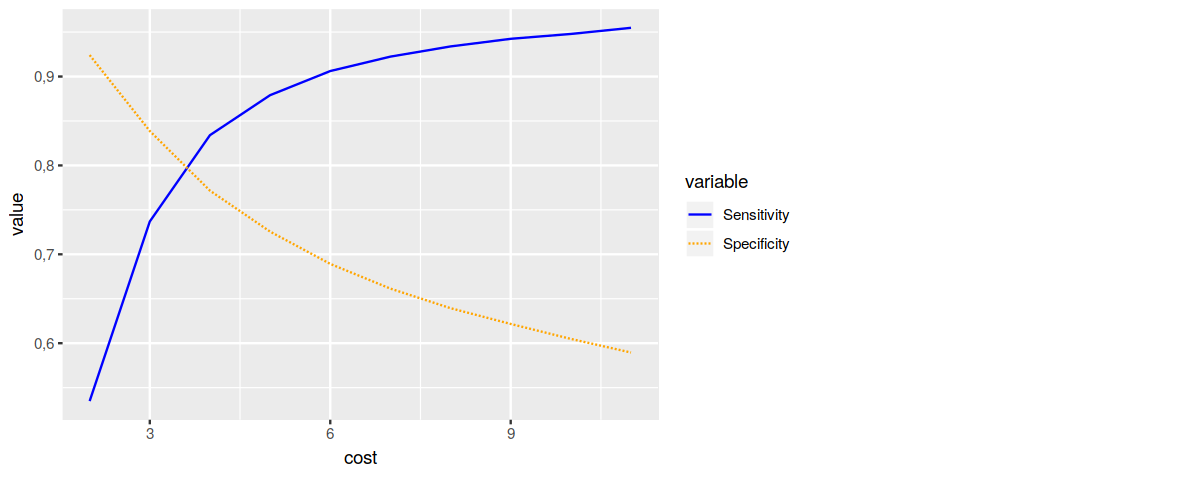

In [22]:
mdf <- metrics %>%
  select(cost, Sensitivity, Specificity) %>%
  gather(key = "variable", value = "value", - cost)
options(repr.plot.width=10, repr.plot.height=4)
ggplot(mdf, aes(x = cost, y = value)) + 
  geom_line(aes(color = variable, linetype = variable)) + 
  scale_color_manual(values = c("blue", "orange"))

We see that increasing the cost we focus on the first class and so we increase the sensitivity. Same claim for specificity.

Let's see the sensitivity against specificity.

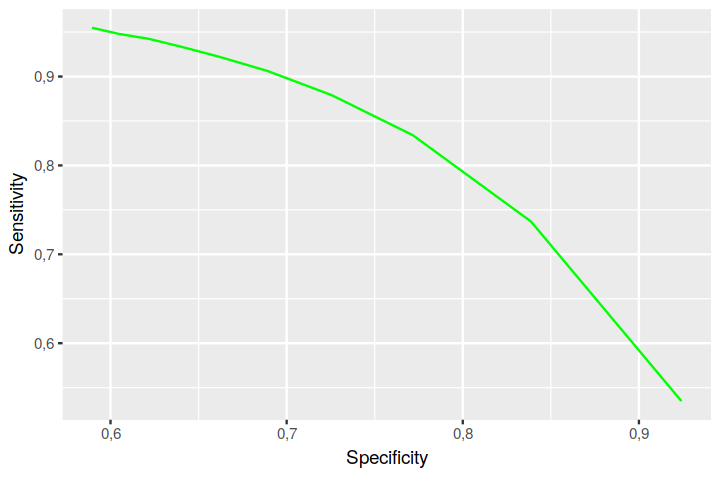

In [63]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(metrics, aes(x = Specificity)) + 
  geom_line(aes(y = Sensitivity), color = "green")

From both plots we can see that a good model for a trade-off is that one with $\mbox{cost} = 4$ so $\mbox{weight} = (4,1)$.

In [64]:
weightedModelFinal <- modelWeighted[[3]]

In [23]:
weightedModelFinal <- readRDS("./models/lrWeightedFinal.RDS")

In [24]:
weightedModelFinal

Generalized Linear Model 

22793 samples
   37 predictor
    2 classes: 'large', 'small' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20514, 20513, 20513, 20513, 20514, 20514, ... 
Resampling results:

  Accuracy   Kappa      Sens       Spec     
  0,7866442  0,5093035  0,8340264  0,7716123


# 5.5 Robustness analysis

We have seen that the different models doesn't differ too much. What we can use to select the best one can be a robustness analysis. 

In this analysis we want to plot the estimated probabilities splitted by the true event.

If we have a robust classifier we expect the two probabilities well seperated.

In [39]:
evalResults <- data.frame(income = evaluationFilled$income.L)
evalResults$weighted <- predict(weightedModelFinal,
       newdata = evaluationFilled,
       type = "prob")[,1]
evalResults$lr <- predict(lrFit,
       newdata = evaluationFilled,
       type = "prob")[,1]
evalResults$smote <- predict(lrSMOTE,
       newdata = evaluationFilled,
       type = "prob")[,1]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

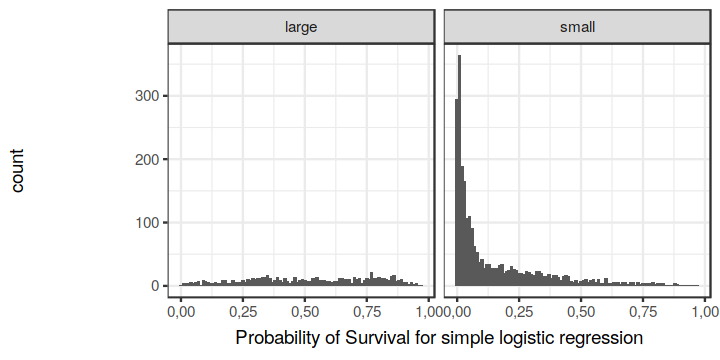

In [41]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(evalResults,aes(x=lr))+ 
    geom_histogram(binwidth = 0.01)+
    facet_grid(~income)+theme_bw() +
    scale_x_continuous(name="Probability of Survival for simple logistic regression")

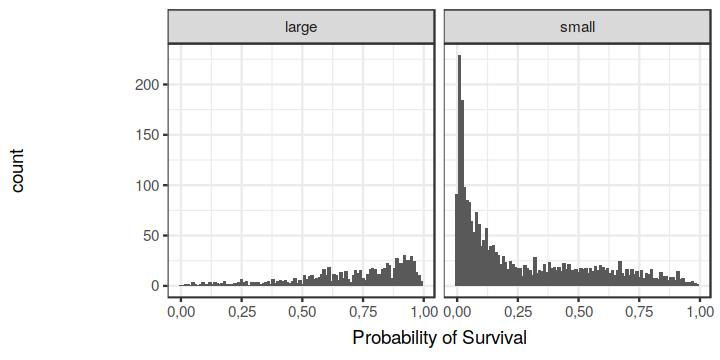

In [29]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(evalResults,aes(x=weighted))+ 
    geom_histogram(binwidth = 0.01)+
    facet_grid(~income)+theme_bw() +
    scale_x_continuous(name="Probability of Survival for weighted logistic regression")

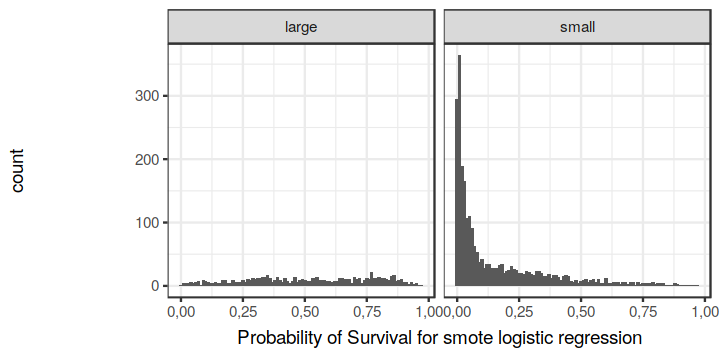

In [42]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(evalResults,aes(x=smote))+ 
    geom_histogram(binwidth = 0.01)+
    facet_grid(~income)+theme_bw() +
    scale_x_continuous(name="Probability of Survival for smote logistic regression")

It's quite clear that the weighted method is surer than the other ones. So it's the more robust method.

# 5.6 Feature importance

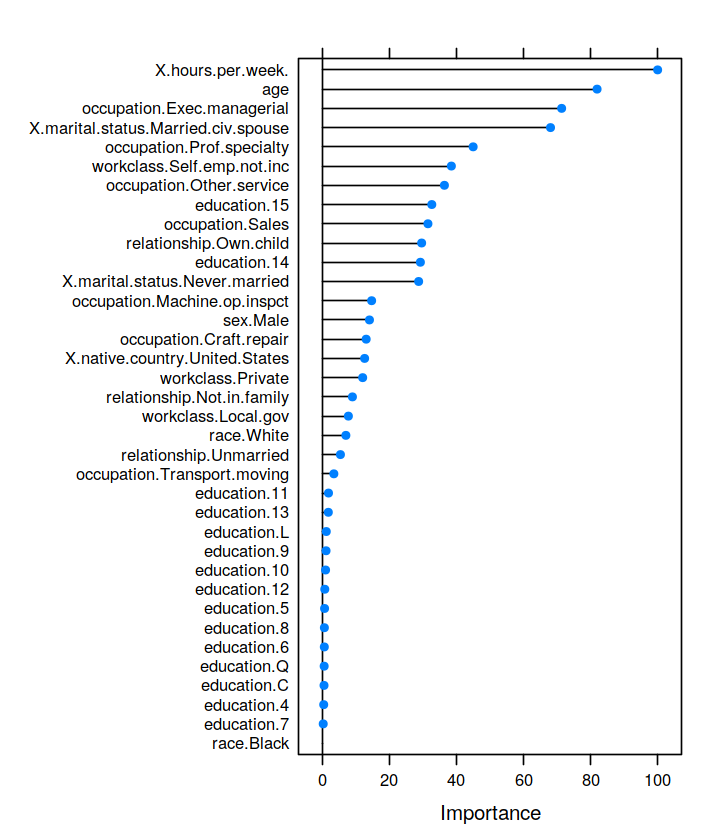

In [45]:
options(repr.plot.width=6, repr.plot.height=7)
plot(varImp(weightedModelFinal))

We see that the importance variable are according to our plots that we have done initially. 

So we are pretty sure that the algorithm is learning something interesting.

# 6. Conclusions

So in the end we have seen a complete analysis using a supervised approach to the imbalanced problem.

We have seen that the sampling techniques doesn't work in this case. In general they are very useful. Maybe the reason why the are not useful here is the slight imbalance. 

In this case a basic method with a moved threshold is enough to achieve good results.

To obtain a more robust method we have used a cost-learning approach. This one doesn't obtain better results in term of sensitivy and specificity but it's surer about its prediction.

Finally we want to say that in general with an imbalanced problem we can have different method to approach it and it doesn't exist the best one. Each time we have to try and see what the best is.